In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

**Load Datasets**

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
y_train.shape


(50000, 1)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train= y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [6]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [7]:
classes=['airplane', 'automobile','bird', 'cat', 'deer','dog','frog', 'horse','ship','truck']

In [55]:
#Function to plot a sample image from the dataset
def plot_sample(X, y, index):
    """
    Plots a single sample image from the dataset with its corresponding label.

    Parameters:
    X (array-like): Array of images.
    y (array-like): Array of labels corresponding to the images.
    index (int): Index of the sample image to be plotted.
    """
    # Create a new figure with a specified size
    plt.figure(figsize=(20, 2))

#Display the image at the given index
    plt.imshow(X[index])

#Set the x-axis label to the class name of the image at the given index
    plt.xlabel(classes[y[index]])

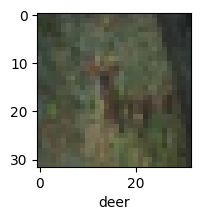

In [56]:
plot_sample(X_train, y_train, 10)

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
ann= models.Sequential([
    layers.Flatten(input_shape= (32, 32, 3)),
    layers.Dense(5000, activation= 'relu' ),
    layers.Dense(1000, activation= 'relu' ),
    layers.Dense(10, activation= 'sigmoid' )

])

ann.compile(optimizer= 'adam', loss ='sparse_categorical_crossentropy', metrics=['accuracy']
)

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 15s 8ms/step - loss: 1.9053 - accuracy: 0.3242
Epoch 2/5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6724 - accuracy: 0.3963
Epoch 3/5
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5885 - accuracy: 0.4295
Epoch 4/5
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5367 - accuracy: 0.4488
Epoch 5/5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4960 - accuracy: 0.4635


In [16]:
from sklearn.metrics import confusion_matrix, classification_report
#Print the classification report print(classification_report(y_test, y_pred_classes))
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(i) for i in y_pred]

# Print the classification report
print(classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.52      0.51      0.51      1000
           1       0.60      0.54      0.57      1000
           2       0.35      0.38      0.36      1000
           3       0.28      0.43      0.34      1000
           4       0.46      0.28      0.34      1000
           5       0.41      0.34      0.37      1000
           6       0.46      0.56      0.50      1000
           7       0.62      0.43      0.50      1000
           8       0.48      0.71      0.57      1000
           9       0.62      0.44      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.48      0.46      0.46     10000
weighted avg       0.48      0.46      0.46     10000



Text(0.5, 25.722222222222214, 'Prediction')

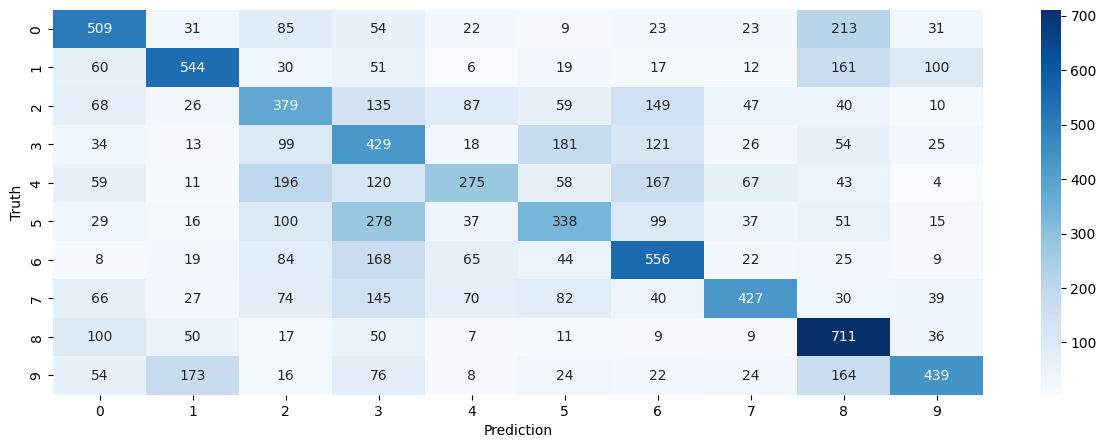

In [17]:
#Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

#Plot the confusion matrix using seaborn
plt.figure(figsize=(15,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Truth')
plt.xlabel('Prediction')

**Cnn model**

In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Change to softmax for multi-class classification
])


cnn.compile(optimizer= 'adam', loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=30)

Epoch 1/30
1563/1563 [==============================] - 11s 4ms/step - loss: 1.5408 - accuracy: 0.4325
Epoch 2/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1401 - accuracy: 0.5951
Epoch 3/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9789 - accuracy: 0.6558
Epoch 4/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8722 - accuracy: 0.6952
Epoch 5/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7900 - accuracy: 0.7211
Epoch 6/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7192 - accuracy: 0.7474
Epoch 7/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6643 - accuracy: 0.7686
Epoch 8/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6188 - accuracy: 0.7835
Epoch 9/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5795 - accuracy: 0.7975
Epoch 10/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.53

In [19]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.7929 - accuracy: 0.6901


[1.7928671836853027, 0.6901000142097473]

In [20]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[6.6854300e-05, 1.1555894e-03, 7.4666480e-07, 9.8853368e-01,
        7.2291797e-08, 2.3547118e-03, 8.8749606e-05, 1.5788935e-06,
        7.7628605e-03, 3.5167137e-05],
       [3.3097417e-06, 3.5826299e-05, 1.7878977e-12, 5.0387809e-15,
        6.0211146e-15, 8.2674767e-18, 7.8971440e-15, 9.0680107e-16,
        9.9994230e-01, 1.8618886e-05],
       [7.2483555e-04, 8.7608304e-03, 1.2334123e-06, 6.5661646e-07,
        7.5524792e-07, 4.6185942e-08, 7.2154078e-09, 9.7016596e-08,
        9.8793530e-01, 2.5762566e-03],
       [4.6451595e-01, 1.2137167e-04, 7.1723248e-06, 1.2595850e-06,
        2.2199661e-03, 1.9259265e-07, 1.5592532e-06, 5.7707195e-10,
        5.3289914e-01, 2.3347863e-04],
       [2.2891267e-17, 3.5965929e-17, 5.1898414e-06, 7.7177640e-07,
        9.9979085e-01, 2.3692208e-07, 2.0293189e-04, 2.2421843e-14,
        8.2335409e-22, 1.2845953e-21]], dtype=float32)

In [23]:

#Print the classification report print(classification_report(y_test, y_pred_classes))
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(i) for i in y_pred]

# Print the classification report
print(classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.78      0.63      0.70      1000
           1       0.78      0.84      0.81      1000
           2       0.54      0.64      0.59      1000
           3       0.58      0.46      0.51      1000
           4       0.60      0.67      0.63      1000
           5       0.57      0.66      0.61      1000
           6       0.74      0.78      0.76      1000
           7       0.77      0.69      0.73      1000
           8       0.79      0.82      0.80      1000
           9       0.82      0.72      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [34]:
#Compute the confusion matrix for the CNN model
conf_matrix_cnn = confusion_matrix(y_test, y_pred_classes)

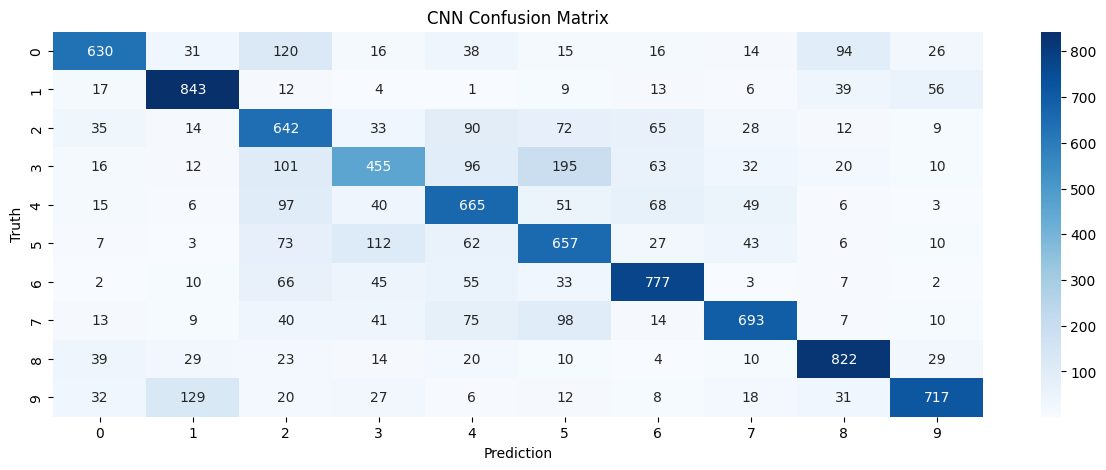

In [36]:
plt.figure(figsize=(15,5))
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('CNN Confusion Matrix')
plt.show()

In [24]:

y_classes= [np.argmax(i) for i in y_pred]
y_classes[:5]

[3, 8, 8, 8, 4]

In [25]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

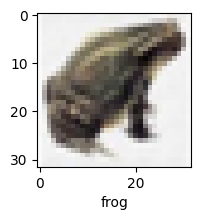

In [53]:
plot_sample(X_test, y_test, 7500)

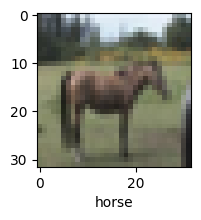

In [54]:
plot_sample(X_test, y_test, 9999)